In [94]:
%pip install catboost

import matplotlib.pyplot as plt
import missingno
import numpy as np 
import pandas as pd 
from scipy.spatial.distance import pdist,cdist
import scipy.stats as stats
import seaborn as sns
import catboost as cb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix,f1_score, roc_auc_score,precision_score ,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

     |████████████████████████████████| 67.4 MB 28 kB/s 


# Funções Auxiliares

In [2]:
def drop_outliers(avg, storage, number_of_elements):
  index_list = []
  for element in avg[-1*number_of_elements:]:
    index_list.extend(storage[element])
  return df.loc[~df.index.isin(index_list)]

# Carregamento do Dataset

In [6]:
!pip install -q kaggle
!wget -O kaggle.json https://cdn.discordapp.com/attachments/539836343094870016/879014144483930142/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c eel891-202101-trabalho-1
!unzip conjunto_de_treinamento.csv.zip 

--2021-08-25 02:27:20--  https://cdn.discordapp.com/attachments/539836343094870016/879567966415511572/kaggle.json
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.134.233, 162.159.133.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.134.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [application/json]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2021-08-25 02:27:20 (19.4 MB/s) - ‘kaggle.json’ saved [63/63]

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/608k [00:00<?, ?B/s]
100% 608k/608k [00:00<00:00, 39.9MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 38.6MB/s]
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 22.9MB/s]
  0% 0.00/478k [00:00<?, ?B/s]
100% 478k/478k [00:00<00:00, 64.8MB/s]
Archive:  conjunto_de_treinamento.csv.zip
  inflating: conjunto_de_treinamento.csv  


In [7]:
df = pd.read_csv("conjunto_de_treinamento.csv")
df_teste = pd.read_csv("conjunto_de_teste.csv")

# Informações do dataset

## Identificação de valores nulos

Com a criação dessa visualização abaixo, foi possível perceber que os dados de treino não possuem valores nulos.

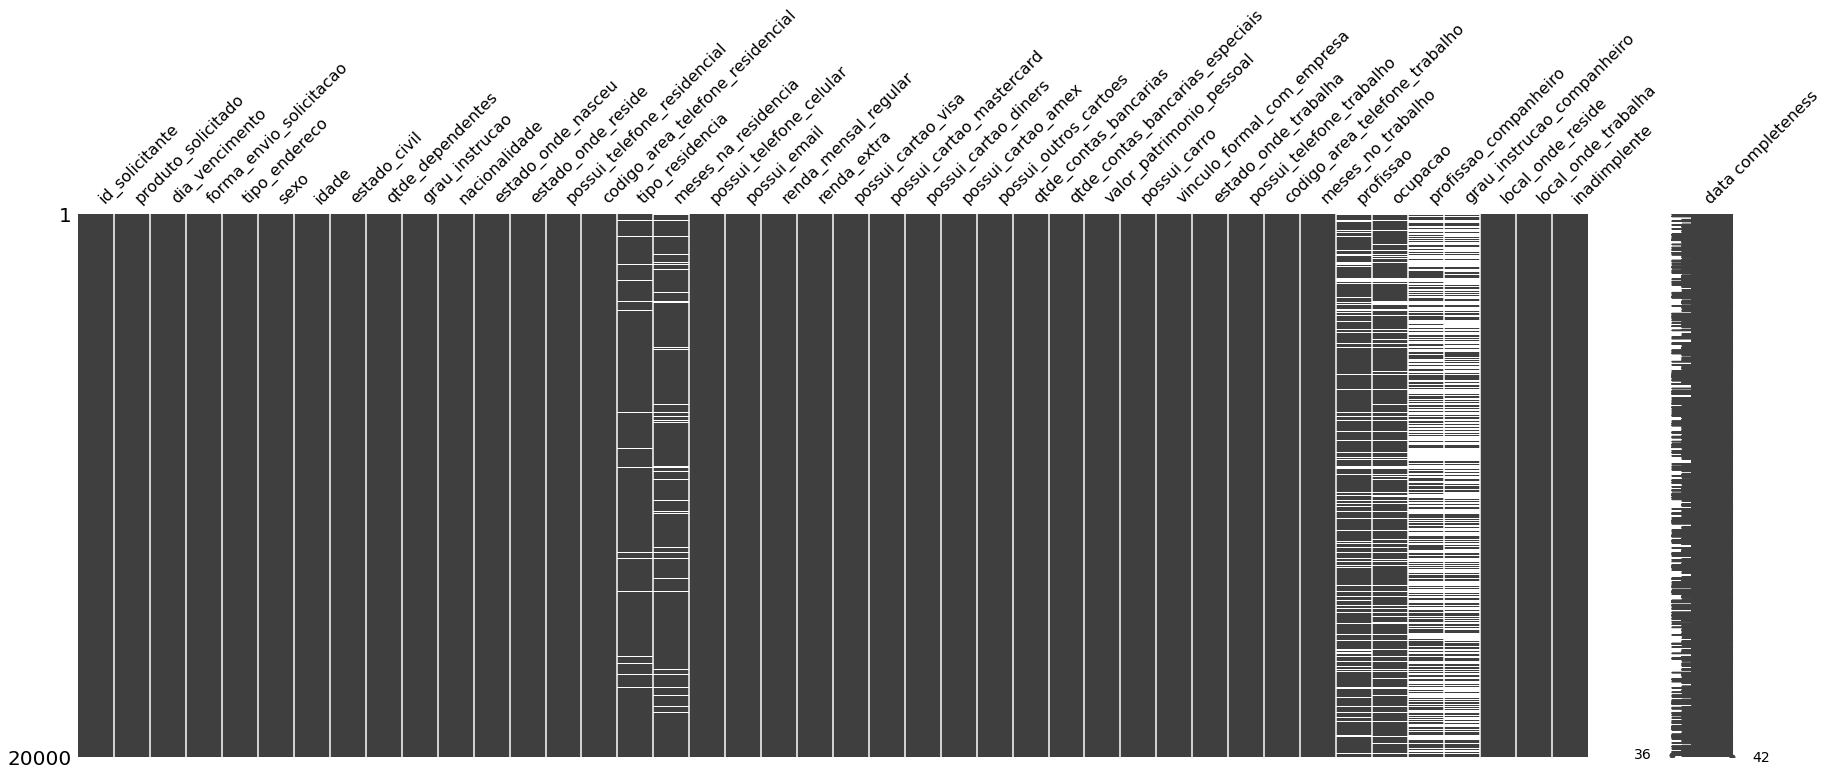

In [8]:
missingno.matrix(df, labels=True, figsize=(30,10))

## Tipo das colunas

Utilizando o .dtypes, é possível observar todos os tipos de dados das colunas, e podemos ver que tem alguns tipos que não são numéricos.

In [9]:
df.dtypes

id_solicitante                        int64
produto_solicitado                    int64
dia_vencimento                        int64
forma_envio_solicitacao              object
tipo_endereco                         int64
sexo                                 object
idade                                 int64
estado_civil                          int64
qtde_dependentes                      int64
grau_instrucao                        int64
nacionalidade                         int64
estado_onde_nasceu                   object
estado_onde_reside                   object
possui_telefone_residencial          object
codigo_area_telefone_residencial     object
tipo_residencia                     float64
meses_na_residencia                 float64
possui_telefone_celular              object
possui_email                          int64
renda_mensal_regular                float64
renda_extra                         float64
possui_cartao_visa                    int64
possui_cartao_mastercard        

## Descrição dos dados (Média, Contagem, Mínimo, Máximo)

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19960,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
id_solicitante,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
produto_solicitado,1,1,1,1,7,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,7,1,1,1,2,1,1,1,1,2,1,2,1,1,1,1,1,...,1,2,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2
dia_vencimento,10,25,20,20,1,20,15,5,25,10,15,1,20,20,25,25,5,15,25,5,10,20,25,10,25,10,5,5,25,15,10,15,10,15,1,10,10,10,25,10,...,10,1,5,10,10,10,15,10,10,25,10,5,10,10,5,25,5,10,15,1,5,25,5,20,10,20,10,10,10,1,10,10,5,5,5,10,20,10,5,20
forma_envio_solicitacao,presencial,internet,internet,internet,internet,presencial,presencial,internet,internet,presencial,presencial,internet,presencial,internet,internet,presencial,internet,presencial,internet,internet,presencial,internet,internet,presencial,internet,internet,presencial,internet,internet,internet,presencial,correio,presencial,internet,internet,internet,internet,presencial,internet,internet,...,internet,presencial,internet,internet,presencial,internet,presencial,presencial,internet,internet,presencial,internet,internet,internet,internet,internet,internet,internet,internet,internet,internet,presencial,internet,presencial,internet,internet,presencial,internet,internet,presencial,presencial,presencial,internet,internet,presencial,presencial,presencial,internet,internet,presencial
tipo_endereco,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
sexo,M,F,F,M,F,M,F,F,F,M,M,M,F,M,M,F,M,F,F,M,F,F,F,F,F,M,F,F,M,F,M,F,M,M,F,F,M,F,F,F,...,M,F,F,F,M,F,F,M,F,F,F,F,F,F,F,F,F,M,F,F,F,F,F,M,F,M,F,M,F,M,F,M,M,F,M,M,F,F,F,F
idade,85,38,37,37,51,21,64,20,39,44,38,23,29,28,33,40,41,54,30,39,19,45,32,28,47,36,56,50,54,31,38,53,60,35,36,57,42,57,43,32,...,25,49,57,25,25,41,27,65,53,32,20,48,64,69,52,53,47,33,26,44,35,46,23,48,36,45,67,77,31,53,52,48,62,18,23,27,26,63,84,53
estado_civil,2,1,2,1,1,1,4,1,2,2,2,1,1,1,2,2,1,2,6,2,1,1,7,6,2,2,1,4,2,1,2,1,2,2,2,1,2,4,5,2,...,1,2,2,1,1,2,1,2,4,1,1,2,2,4,4,1,4,1,1,2,1,1,2,2,2,2,4,4,1,1,4,2,4,1,2,2,2,2,1,1
qtde_dependentes,0,0,0,1,3,1,2,0,2,2,0,1,1,0,1,0,3,0,1,1,1,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,6,0,0,0,0,0,0,2,6,0,1,0,0,0,2,0,0,0,0,3,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0
grau_instrucao,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Com essa visualização, além de ter mais informações sobre os tipos de dados e seus valores.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_solicitante,20000.0,10000.500000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
produto_solicitado,20000.0,1.284350,1.008239,1.0,1.00,1.0,1.00,7.0
dia_vencimento,20000.0,13.147250,6.748507,1.0,10.00,10.0,20.00,25.0
tipo_endereco,20000.0,1.006350,0.079435,1.0,1.00,1.0,1.00,2.0
idade,20000.0,42.352500,14.930177,7.0,31.00,40.0,52.00,106.0
estado_civil,20000.0,2.120850,1.332004,0.0,1.00,2.0,2.00,7.0
qtde_dependentes,20000.0,0.666400,1.236725,0.0,0.00,0.0,1.00,53.0
grau_instrucao,20000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
nacionalidade,20000.0,0.961600,0.202305,0.0,1.00,1.0,1.00,2.0
tipo_residencia,19464.0,1.261303,0.883580,0.0,1.00,1.0,1.00,5.0


## Matriz de correlação

Antes de dropar efetivamente as colunas desnecessárias, foi criada uma matriz de correlação para verificar melhor quais parâmetros tinham relação direta com a variável alvo a fim de melhorar o modelo gerado.

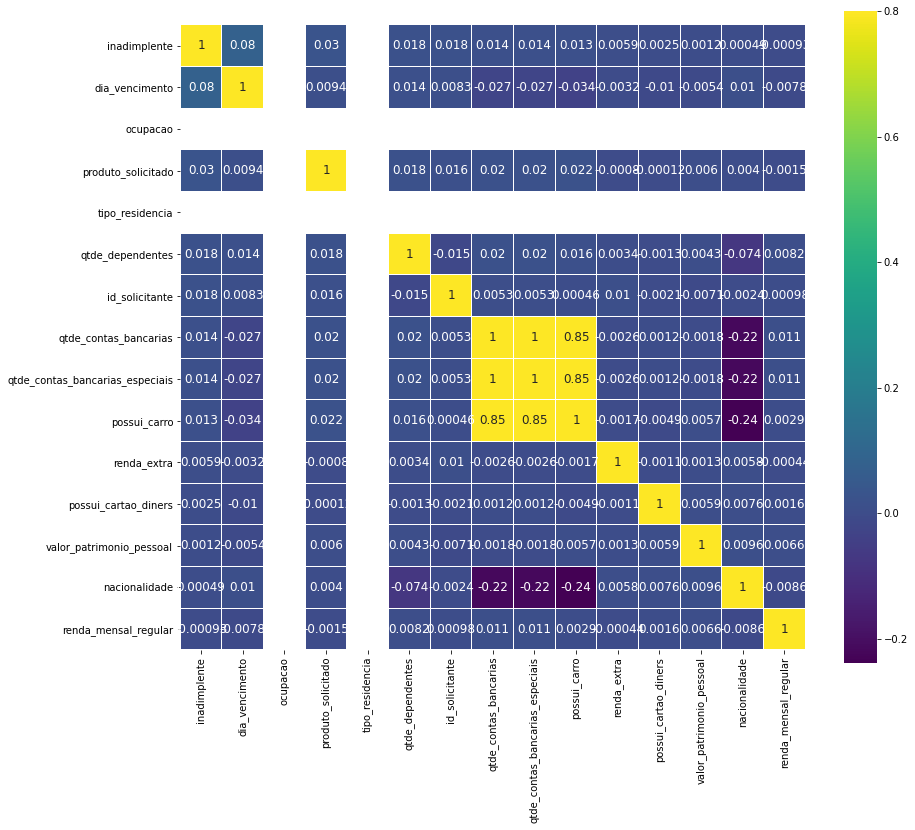

In [12]:
correlation = df.corr()

# Heatmap of positive correlation features
k = len([i for i in correlation['inadimplente'] if abs(i) >= 0.015])
cols = correlation.nlargest(k,'inadimplente')['inadimplente'].index
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

Após observar a matriz de correlação, é possível encontrar as colunas que são diretamente relacionadas à variável alvo e também encontrar colunas que não possuem relação nenhuma ou baixa relação com o nosso ponto de interesse, deste modo é facilitado a escolha de quais variáveis devem ser removidas do dataset.

# Tratamento do dataset

Após a leitura do dicionário de dados, foram escolhidas algumas colunas para dropar, outras para binarizar e outras para aplicar one-hot-encoding, como veremos melhor abaixo

In [13]:
df = df.set_index(df['id_solicitante'])
df = df.drop(['id_solicitante'], axis=1)

## Tratando valores nulos

Para tratar os nulos, é importante ter em mente a sua quantidade perante ao tamanho do dataset. Pois uma remoção ampla pode acabar prejudicando o dataset e a acurácia do modelo.

Primeiramente foi visto que algumas colunas possuiam valores como string vazia em vez de nulo, para tratarmos igualmente tais valores, convertemos para nulo a fim de preencher com valores fake.

In [14]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
df_teste = df_teste.replace(r'^\s*$', np.NaN, regex=True)

Como os valores de sexo podem assumir 3 valores ('M', 'F', e 'N'), foi optado por alterar os dados nulos para N.

In [16]:
df['sexo'].fillna('N', inplace=True)
df_teste['sexo'].fillna('N', inplace=True)

Após os tratamentos separados terem acontecidos, foi se alterado os dados de nulo para a mediana dos valores para aquela coluna em todo o dataset, a fim de não possuir dados nulos.

In [17]:
df.fillna(df.median(), inplace=True)
df_teste.fillna(df_teste.median(), inplace=True)

## Binarização

In [19]:
df['possui_telefone_residencial'] = LabelBinarizer().fit_transform(df['possui_telefone_residencial'])
df_teste['possui_telefone_residencial'] = LabelBinarizer().fit_transform(df_teste['possui_telefone_residencial'])

## One-hot-encoding

In [20]:
df = pd.get_dummies(df, columns=['sexo','vinculo_formal_com_empresa','possui_telefone_trabalho','possui_carro','forma_envio_solicitacao'])
df_teste = pd.get_dummies(df_teste, columns=['sexo','vinculo_formal_com_empresa','possui_telefone_trabalho','possui_carro','forma_envio_solicitacao'])

## Colunas Dropadas

Antes de dropar as colunas efetivamente, foi observado quais são os possíveis valores existentes nessas colunas, para saber se eles realmente podem influenciar no resultado ou não.

In [22]:
df = df.drop(['produto_solicitado', 'tipo_endereco', 'grau_instrucao',
              'estado_onde_nasceu', 'estado_onde_reside', 'possui_telefone_celular',
              'possui_email', 'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
              'qtde_contas_bancarias_especiais', 'estado_onde_trabalha', 'codigo_area_telefone_trabalho',
              'ocupacao', 'profissao_companheiro', 'grau_instrucao_companheiro',
              'local_onde_reside', 'local_onde_trabalha'
              ], axis=1)
df_teste = df_teste.drop(['produto_solicitado', 'tipo_endereco', 'grau_instrucao',
              'estado_onde_nasceu', 'estado_onde_reside', 'possui_telefone_celular',
              'possui_email', 'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
              'qtde_contas_bancarias_especiais', 'estado_onde_trabalha', 'codigo_area_telefone_trabalho',
              'ocupacao', 'profissao_companheiro', 'grau_instrucao_companheiro',
              'local_onde_reside', 'local_onde_trabalha'
              ], axis=1)

## Verificação de Outliers

Para verificar os outliers desse dataset, após o tratamento prévio, foi calculada a distância euclidiana a fim de observar a maior variação e remover os valores nela contidos.

Text(0.5, 1.0, 'Média da Distância Euclidiana')

<Figure size 432x288 with 0 Axes>

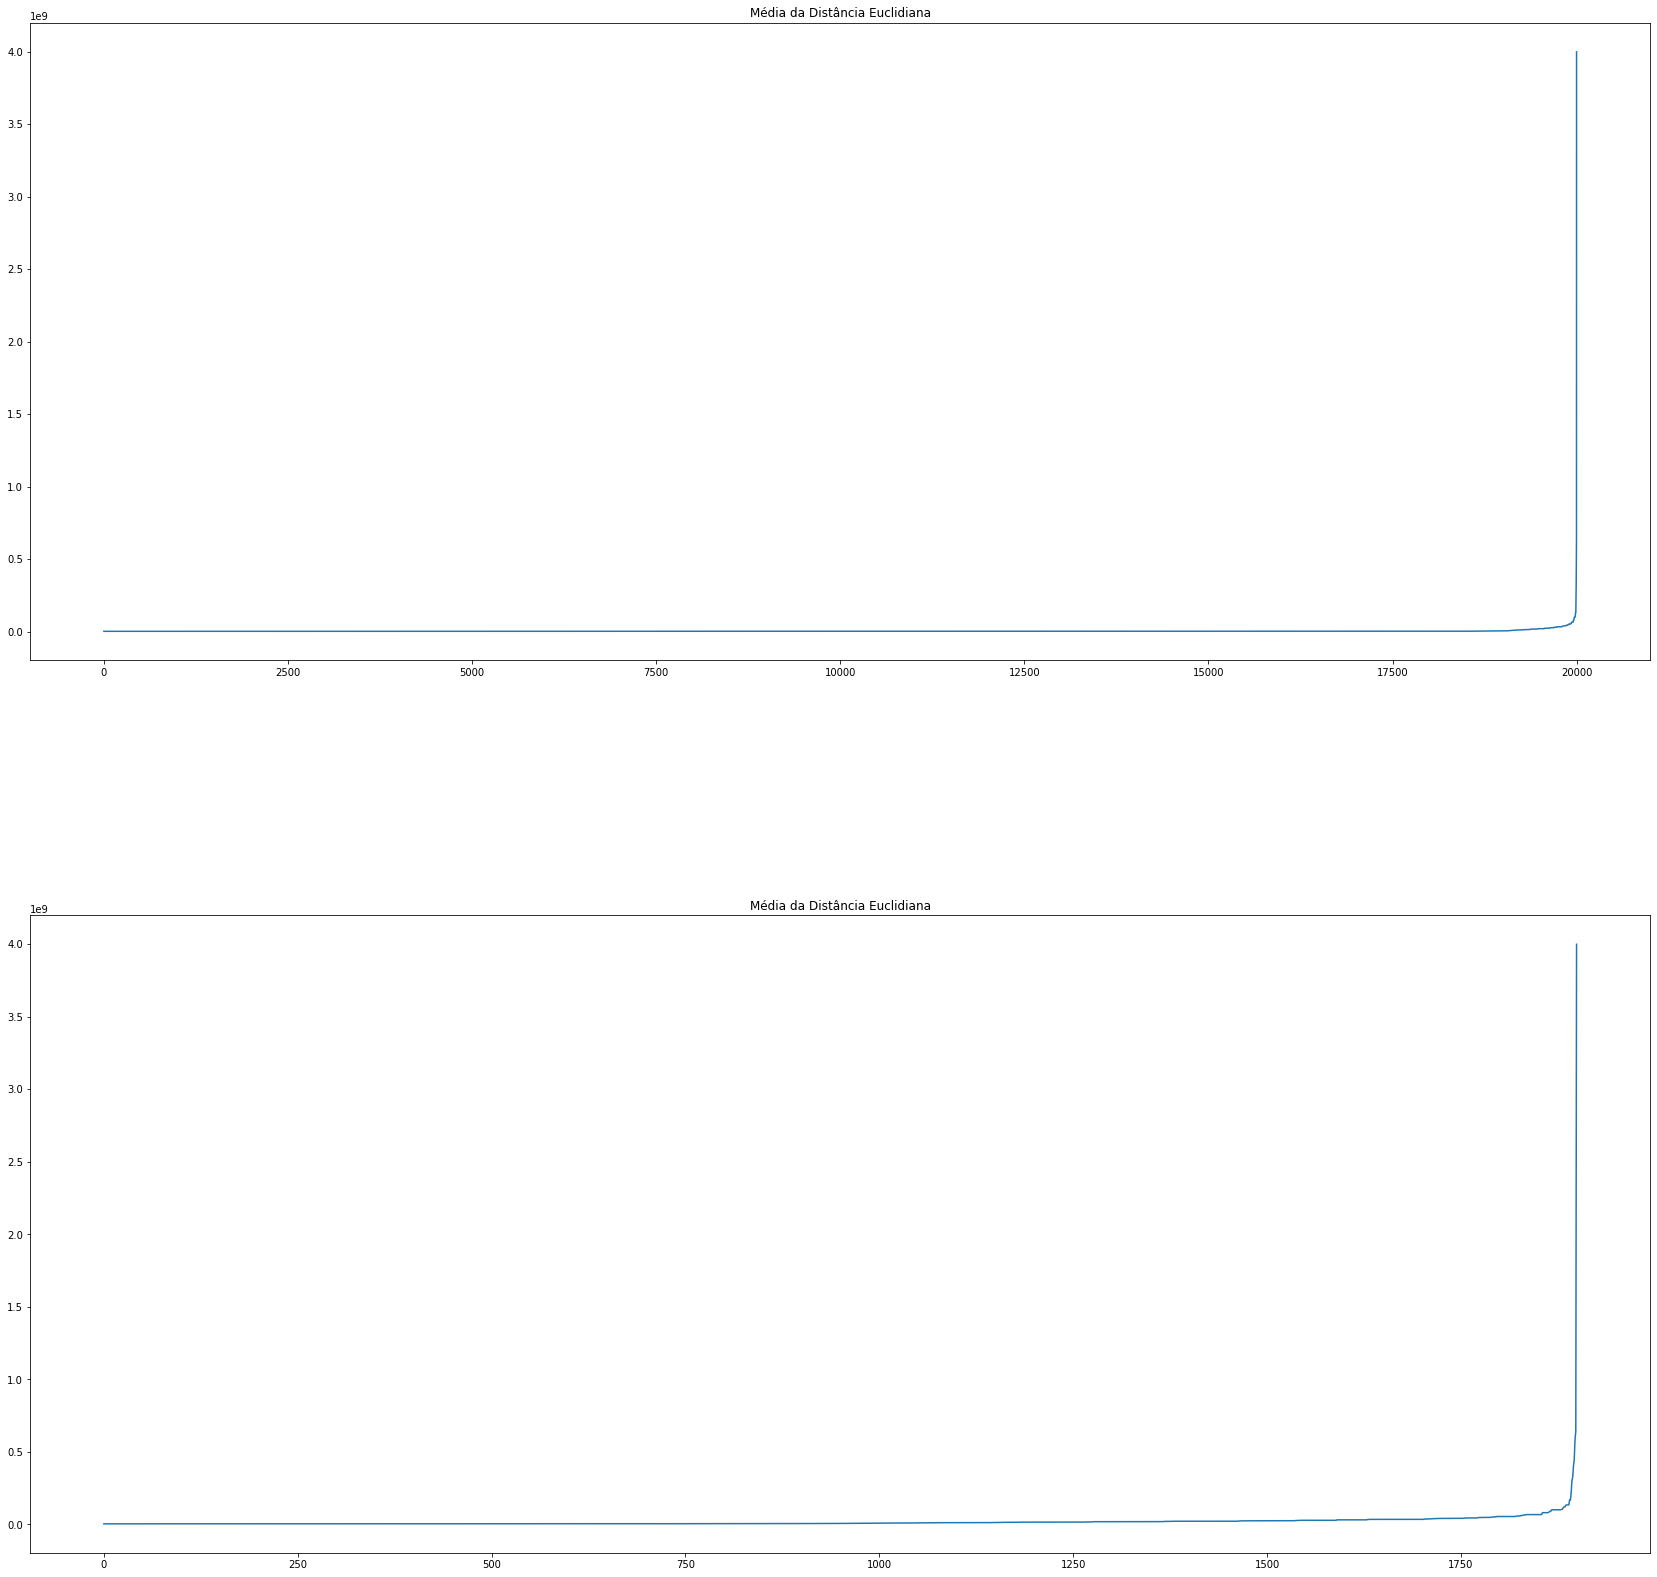

In [23]:
x = pdist(df.values, 'euclid')
values_number = len(df.values)
columns_number = len(df.columns)
avg = []
storage = {}

for i in range(values_number):
  sum = 0
  for j in range(i):
    sum += x[values_number * j + i - ((j + 2) * (j + 1)) // 2]
  for j in range(i + 1, values_number):
    sum += x[values_number * i + j - ((i + 2) * (i + 1)) // 2]
  result = sum/columns_number
  avg.append(result)

  if result not in storage:
    storage[result] = [i]
  else:
    storage[result].append(i)


plt.figure()
fig, axs = plt.subplots(2, 1, figsize=(25, 25))
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
avg.sort()

axs[0].plot(avg)
axs[0].set_title('Média da Distância Euclidiana')

axs[1].plot(avg[18100:])
axs[1].set_title('Média da Distância Euclidiana')

Após observar os gráficos, vimos que dentre os valores, os valores de 80 em diante são outliers, deste modo foi optado por de 60 em diante.

In [24]:
df = drop_outliers(avg, storage, 60)

# Análise

## Dataset de treino e teste

Tendo feito todo o tratamento considerado necessário para o dataset, foi separado x e y em conjunto de treino e teste dentro do df de treino para poder realizar o cálculo da precisão do modelo

In [69]:
x = df.loc[:,df.columns != 'inadimplente'].to_numpy()
y = df.loc[:,'inadimplente'].to_numpy()


x_TESTE = df_teste.set_index(df_teste['id_solicitante'])
x_TESTE = x_TESTE.drop(['id_solicitante'], axis=1)
x_TESTE = x_TESTE.iloc[:,:].to_numpy()

In [57]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=100)

In [58]:
MinMaxScaler().fit(x_treino)

MinMaxScaler(copy=True, feature_range=(0, 1))

## Gradient Boosting

Para este método, a fim de definir os melhores hiperparêmetros, foi feito um brute force pelos hiper parâmetros de número de estimators, profundidade máxima e random_state.

In [76]:
results = []
for n_estimators in range(20, 220, 20):
  for max_depth in range(2, 16, 2):
    clfGB = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
    pred = clfGB.fit(x_treino, y_treino).predict(x_teste)
    results.append((n_estimators, max_depth, accuracy_score(y_teste,pred)))

20 2
20 4
20 6
20 8
20 10
20 12
20 14
40 2
40 4
40 6
40 8
40 10
40 12
40 14
60 2
60 4
60 6
60 8
60 10
60 12
60 14
80 2
80 4
80 6
80 8
80 10
80 12
80 14
100 2
100 4
100 6
100 8
100 10
100 12
100 14
120 2
120 4
120 6
120 8
120 10
120 12
120 14
140 2
140 4
140 6
140 8
140 10
140 12
140 14
160 2
160 4
160 6
160 8
160 10
160 12
160 14
180 2
180 4
180 6
180 8
180 10
180 12
180 14
200 2
200 4
200 6
200 8
200 10
200 12
200 14


Após o retorno do código anterior, o resultado é armazenado na lista results e, ao final, estes resultados é ordenado com base no valor obtido da acurácia, deste modo teremos os melhores hiperparâmetros da melhor acurácia.

In [77]:
best_choose = sorted(results, key=lambda i: i[-1])
print (best_choose[-1])

(80, 6, 6, 0.6035606820461384)


Após terem sido definidos os melhores hiperparâmetros para número de estimators e profundidade máxima, fui em busca do valor ideal para random_state seguindo o mesmo princípio.

In [89]:
results = []
for random_state in range(1000, 3200, 100):
  print(random_state)
  clfGB = GradientBoostingClassifier(n_estimators=80, max_depth=6, random_state=random_state)
  pred = clfGB.fit(x_treino, y_treino).predict(x_teste)
  results.append((random_state, accuracy_score(y_teste,pred)))

1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [90]:
best_choose = sorted(results, key=lambda i: i[-1])
print (best_choose[-1])

(1500, 0.604062186559679)


In [91]:
clfGB = GradientBoostingClassifier(n_estimators=80, max_depth=6, random_state=1500)
pred = clfGB.fit(x_treino, y_treino).predict(x_teste)
print(accuracy_score(y_teste,pred))

0.604062186559679


## CatBoosting

Para esta metodologia, também foi seguido o mesmo padrão para GradientBoosting para encontrar os melhores hiperparâmetros

In [98]:
results = []
for iterations in range(20, 220, 20):
  for depth in range(2, 14, 2):
    clfCB = cb.CatBoostClassifier(depth=depth, iterations=iterations, learning_rate=0.1, verbose=False)
    pred = clfCB.fit(x_treino, y_treino).predict(x_teste)
    results.append((iterations, depth, accuracy_score(y_teste,pred)))

20 2
20 4


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

20 6
20 8
20 10
20 12
40 2
40 4
40 6
40 8
40 10
40 12
60 2
60 4
60 6
60 8
60 10
60 12
80 2
80 4
80 6
80 8
80 10
80 12
100 2
100 4
100 6
100 8
100 10
100 12
120 2
120 4
120 6
120 8
120 10
120 12
140 2
140 4
140 6
140 8
140 10
140 12
160 2
160 4
160 6
160 8
160 10
160 12
180 2
180 4
180 6
180 8
180 10
180 12
200 2
200 4
200 6
200 8
200 10
200 12


In [99]:
best_choose = sorted(results, key=lambda i: i[-1])
print (best_choose[-1])

(40, 6, 0.6088264794383149)


In [101]:
clfCB = cb.CatBoostClassifier(depth=6, iterations=40, learning_rate=0.1, verbose=False)
pred = clfCB.fit(x_treino, y_treino).predict(x_teste)
print(accuracy_score(y_teste,pred))

0.6088264794383149


# Resultado

Mesmo o resultado de CatBoosting sendo melhor para o df de treino, durante a submissão do kaggle este resultado não foi tão bom comparado ao do Gradient Boosting.

In [105]:
model = clfGB.fit(x,y)
y_resposta_TESTE = model.predict(x_TESTE)
df_args = { 'id_solicitante': df_teste['id_solicitante'].astype(int), 'inadimplente': y_resposta_TESTE }
prediction = pd.DataFrame(df_args)
prediction.to_csv('out.csv', index=False)